In [1]:
# Cell 1: Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')


In [2]:
df = pd.read_csv('../gaming_churn_data.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (10000, 17)


,player_id,registration_date,days_since_registration,segment,total_playtime_hours,session_frequency_per_week,avg_session_duration_min,total_spending_usd,days_since_last_login,achievement_count,friend_count,chat_messages_sent,in_game_purchases_count,level_reached,churn_probability,churned_7day,churned_30day
0,P1000,2025-11-17,42,Casual,19.6,1.1,6.4,0.00,0,45,1,0,0,9,0.3560,0,0
1,P1001,2025-11-23,36,Whale,123.2,5.8,94.6,873.70,1,97,39,210,58,61,0.0000,0,0
2,P1002,2025-12-12,17,Regular,35.4,5.4,28.2,32.36,0,75,24,67,2,17,0.2601,0,0
3,P1003,2025-10-06,84,Regular,32.7,6.7,44.8,59.14,4,75,9,100,3,16,0.1943,0,0
4,P1004,2025-11-01,58,Casual,5.2,2.9,33.3,0.00,9,45,0,11,0,2,0.5578,1,0


In [3]:
df.describe()

,days_since_registration,total_playtime_hours,session_frequency_per_week,avg_session_duration_min,total_spending_usd,days_since_last_login,achievement_count,friend_count,chat_messages_sent,in_game_purchases_count,level_reached,churn_probability,churned_7day,churned_30day
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,89.375300,57.618270,5.428420,44.450300,69.389363,3.768900,71.043100,16.939100,64.394400,4.403300,27.812400,0.291975,0.187600,0.00250
std,84.458893,61.396123,4.613982,38.484722,183.489945,4.698798,25.259007,18.085494,79.351655,12.131841,29.203361,0.249624,0.390412,0.04994
min,1.000000,1.000000,0.500000,5.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,26.000000,14.000000,1.900000,15.000000,0.000000,1.000000,45.000000,4.000000,9.000000,0.000000,7.000000,0.058075,0.000000,0.00000
50%,63.000000,34.400000,4.000000,30.900000,18.290000,2.000000,75.000000,11.000000,36.000000,1.000000,17.000000,0.265800,0.000000,0.00000
75%,127.000000,72.625000,7.600000,63.325000,54.527500,5.000000,75.000000,24.000000,86.000000,3.000000,36.000000,0.459625,0.000000,0.00000
max,365.000000,373.600000,37.500000,245.000000,1791.890000,51.000000,112.000000,136.000000,590.000000,119.000000,100.000000,0.950000,1.000000,1.00000


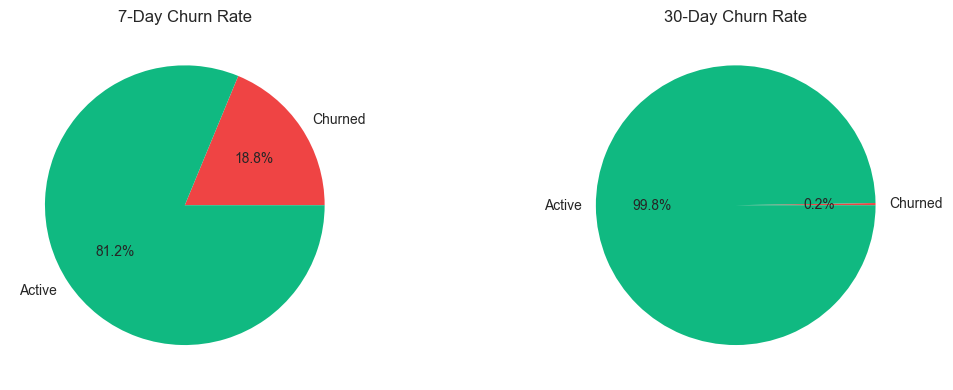

In [4]:
# Churn Rate Analysis
churn_7day_rate = df['churned_7day'].mean()
churn_30day_rate = df['churned_30day'].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].pie([churn_7day_rate, 1-churn_7day_rate], 
            labels=['Churned', 'Active'],
            autopct='%1.1f%%',
            colors=['#ef4444', '#10b981'])
axes[0].set_title('7-Day Churn Rate')

axes[1].pie([churn_30day_rate, 1-churn_30day_rate],
            labels=['Churned', 'Active'],
            autopct='%1.1f%%',
            colors=['#ef4444', '#10b981'])
axes[1].set_title('30-Day Churn Rate')
plt.tight_layout()
plt.savefig('../visualizations/churn_rates.png', dpi=300)
plt.show()

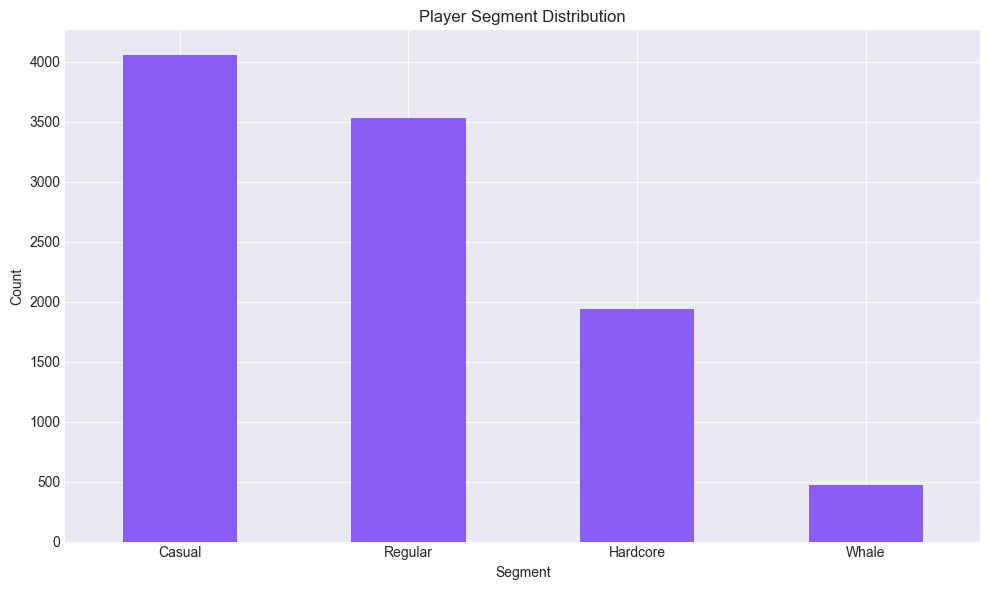

In [5]:
# Segment distribution
segment_counts = df['segment'].value_counts()
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='#8b5cf6')
plt.title('Player Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../visualizations/segment_distribution.png', dpi=300)
plt.show()


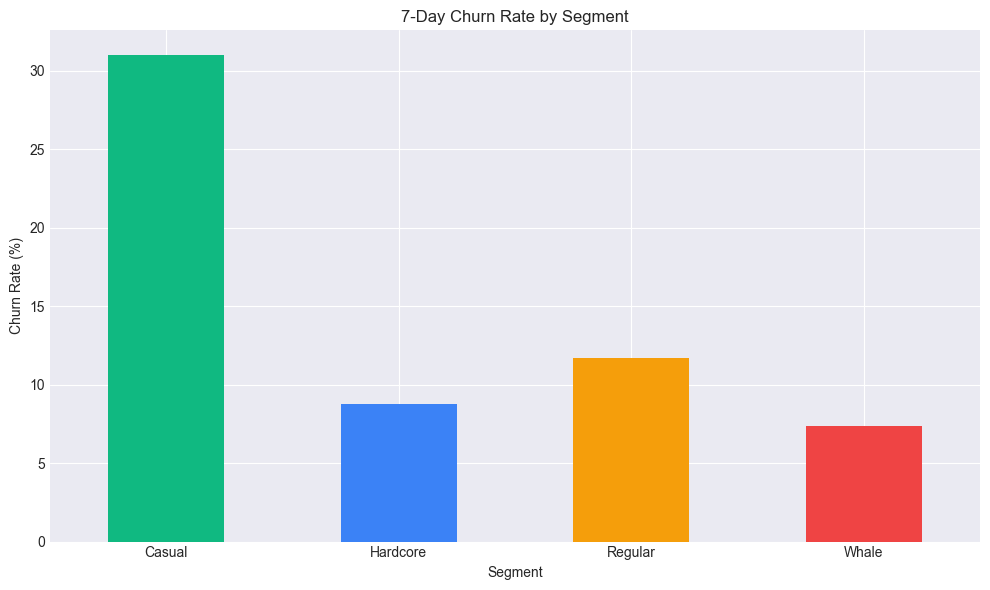

In [6]:
# Churn by Segment
segment_churn = df.groupby('segment')['churned_7day'].mean() * 100
plt.figure(figsize=(10, 6))
segment_churn.plot(kind='bar', color=['#10b981', '#3b82f6', '#f59e0b', '#ef4444'])
plt.title('7-Day Churn Rate by Segment')
plt.xlabel('Segment')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../visualizations/churn_by_segment.png', dpi=300)
plt.show()

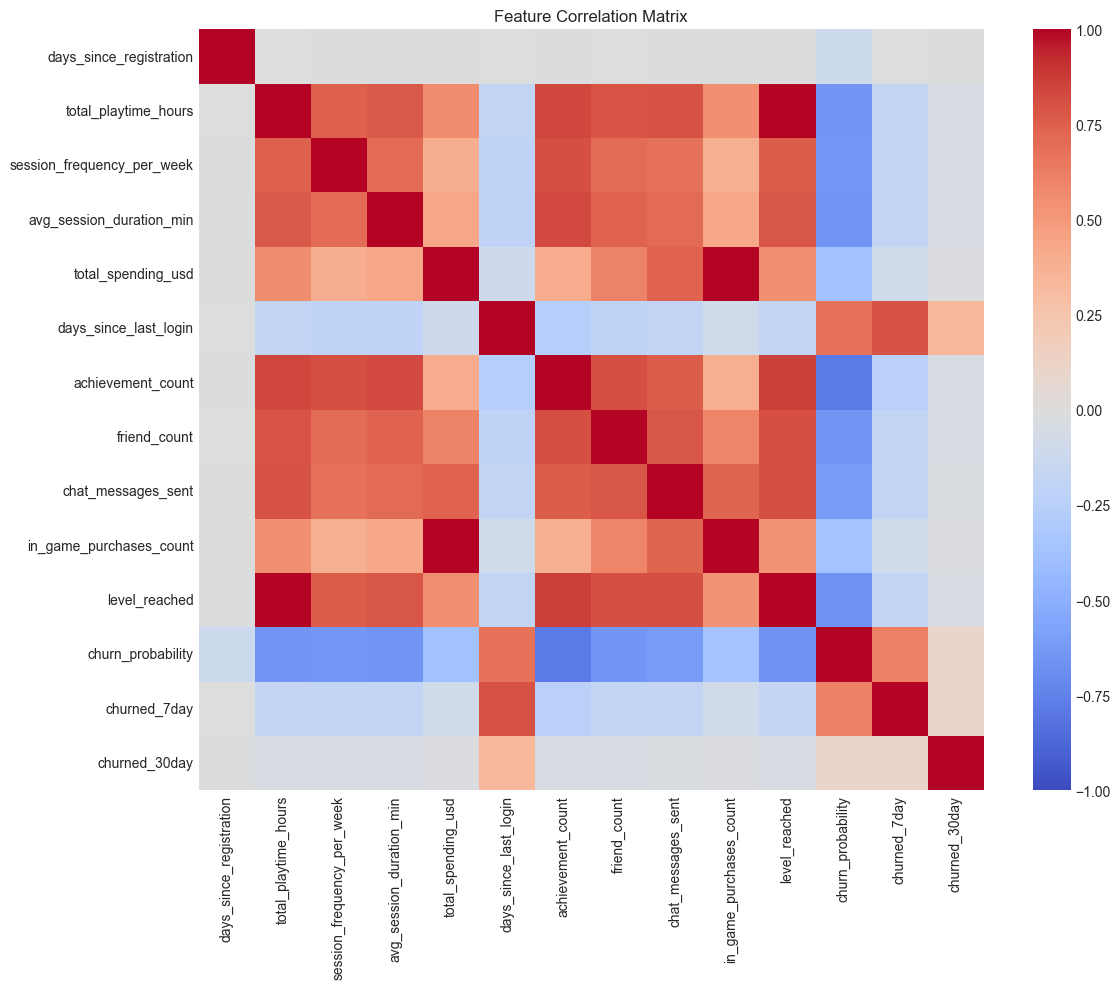

In [7]:
# Feature Correlations 
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=False, 
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../visualizations/correlation_matrix.png', dpi=300)
plt.show()


In [9]:
# Top Correlations with churn
churn_correlations = df[numeric_cols].corr()['churned_7day'].sort_values(ascending=False)
print("Top 10 Features Correlated with 7-Day Churn:")
print(churn_correlations.head(10))

Top 10 Features Correlated with 7-Day Churn:
churned_7day               1.000000
days_since_last_login      0.799743
churn_probability          0.614538
churned_30day              0.104179
days_since_registration   -0.006233
in_game_purchases_count   -0.091547
total_spending_usd        -0.095164
total_playtime_hours      -0.172144
chat_messages_sent        -0.172216
level_reached             -0.175936
Name: churned_7day, dtype: float64


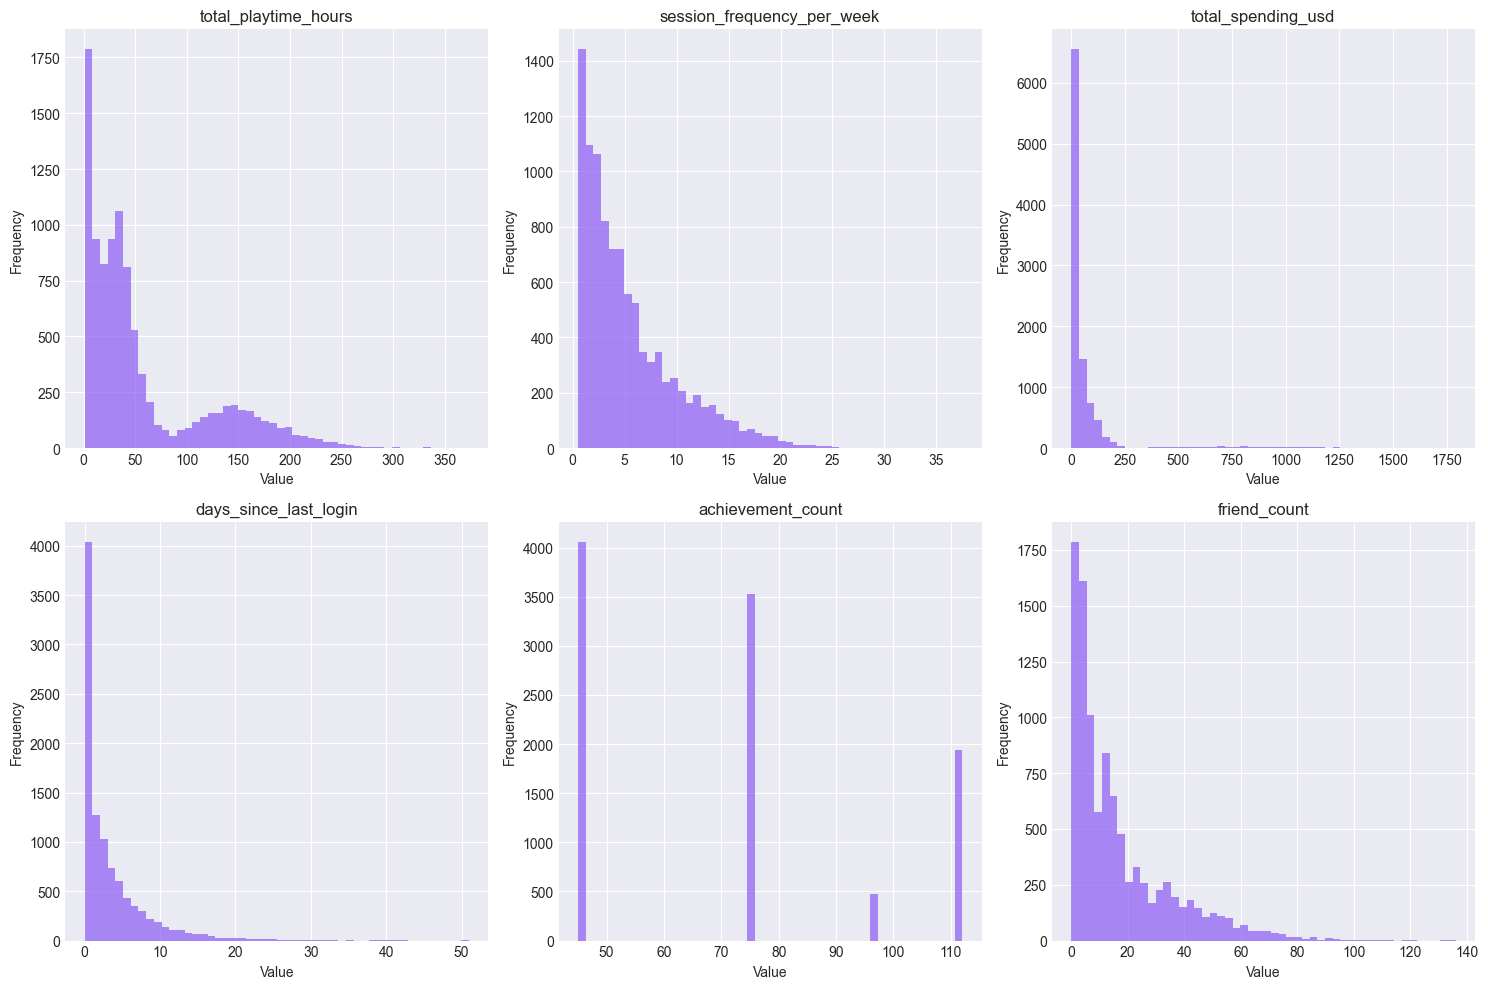

In [8]:
# Distribution of Key Features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

features = ['total_playtime_hours', 'session_frequency_per_week', 
            'total_spending_usd', 'days_since_last_login',
            'achievement_count', 'friend_count']

for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=50, color='#8b5cf6', alpha=0.7)
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../visualizations/feature_distributions.png', dpi=300)
plt.show()

In [10]:
# Key Insights Summary
print("KEY INSIGHTS FROM EDA")
print("=" * 60)
print(f"1. Total Players: {len(df):,}")
print(f"2. 7-Day Churn Rate: {churn_7day_rate:.1%}")
print(f"3. 30-Day Churn Rate: {churn_30day_rate:.1%}")
print(f"4. Highest Churn Segment: {segment_churn.idxmax()} ({segment_churn.max():.1f}%)")
print(f"5. Lowest Churn Segment: {segment_churn.idxmin()} ({segment_churn.min():.1f}%)")
print(f"6. Average Playtime: {df['total_playtime_hours'].mean():.1f} hours")
print(f"7. Average Spending: ${df['total_spending_usd'].mean():.2f}")
print(f"8. Most Important Feature: {churn_correlations.index[1]}")

KEY INSIGHTS FROM EDA
1. Total Players: 10,000
2. 7-Day Churn Rate: 18.8%
3. 30-Day Churn Rate: 0.2%
4. Highest Churn Segment: Casual (31.0%)
5. Lowest Churn Segment: Whale (7.4%)
6. Average Playtime: 57.6 hours
7. Average Spending: $69.39
8. Most Important Feature: days_since_last_login
